In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for plotting
import matplotlib.image as mpimg
import seaborn as sns # to generate stylised plots

In [4]:
df=pd.read_csv("C:/Users/91727/Desktop/WineQT.csv")

In [6]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1143.0,8.311111,1.747595,4.60000,7.10000,7.90000,9.100000,15.90000
volatile acidity,1143.0,0.531339,0.179633,0.12000,0.39250,0.52000,0.640000,1.58000
citric acid,1143.0,0.268364,0.196686,0.00000,0.09000,0.25000,0.420000,1.00000
residual sugar,1143.0,2.532152,1.355917,0.90000,1.90000,2.20000,2.600000,15.50000
chlorides,1143.0,0.086933,0.047267,0.01200,0.07000,0.07900,0.090000,0.61100
free sulfur dioxide,1143.0,15.615486,10.250486,1.00000,7.00000,13.00000,21.000000,68.00000
total sulfur dioxide,1143.0,45.914698,32.782130,6.00000,21.00000,37.00000,61.000000,289.00000
density,1143.0,0.996730,0.001925,0.99007,0.99557,0.99668,0.997845,1.00369
pH,1143.0,3.311015,0.156664,2.74000,3.20500,3.31000,3.400000,4.01000
sulphates,1143.0,0.657708,0.170399,0.33000,0.55000,0.62000,0.730000,2.00000


In [9]:
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

<AxesSubplot:>

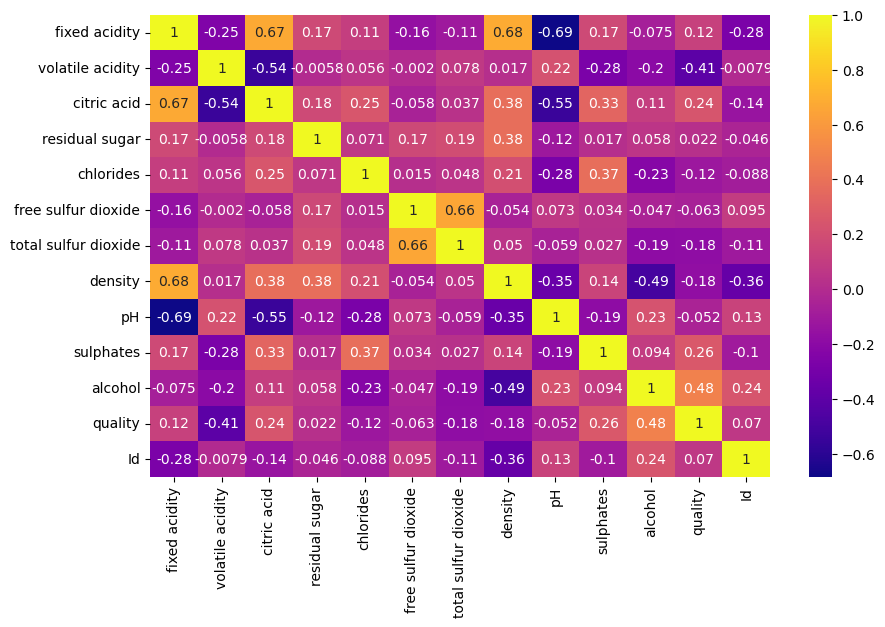

In [10]:
#Exploratory Data Analysis
fig,ax = plt.subplots(figsize = (10,6))
sns.heatmap(df.corr(),cmap = 'plasma', annot= True)

<AxesSubplot:>

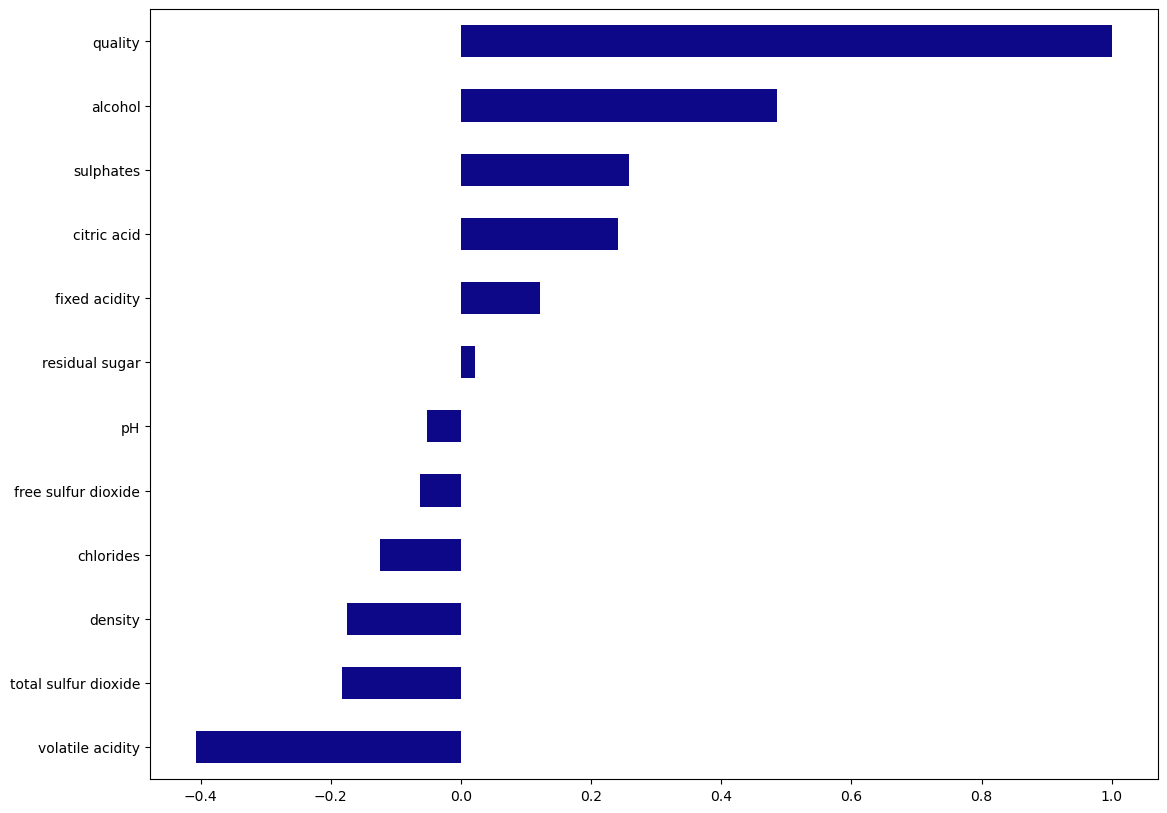

In [11]:
df.corr()['quality'][:-1].sort_values().plot(kind = 'barh',figsize = (13,10), colormap = 'plasma')

In [12]:
df.quality.value_counts()

5    483
6    462
7    143
4     33
8     16
3      6
Name: quality, dtype: int64

In [13]:
df['quality_binary'] = df.quality.apply(lambda x : 1 if x >6 else 0)

In [14]:
df.quality_binary.value_counts()

0    984
1    159
Name: quality_binary, dtype: int64

In [15]:
X = df.drop(columns = ['quality','quality_binary']).values
y = df.quality_binary.values.reshape(-1, 1)

In [16]:
from sklearn.preprocessing import MinMaxScaler
X_scaler = MinMaxScaler().fit(X)
X_new = X_scaler.transform(X)

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_new,y,train_size= 0.75, random_state= 101)

In [18]:
#Instantiate a Decision Tree classifier
from sklearn import tree
model1 = tree.DecisionTreeClassifier()
model1.fit(X_train,y_train)

DecisionTreeClassifier()

In [19]:
y_pred = model1.predict(X_test)

In [20]:
from sklearn.metrics import classification_report, confusion_matrix,roc_auc_score, auc
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.94      0.94       251
           1       0.59      0.63      0.61        35

    accuracy                           0.90       286
   macro avg       0.77      0.78      0.78       286
weighted avg       0.90      0.90      0.90       286

[[236  15]
 [ 13  22]]


In [21]:
roc_auc_score(y_test, y_pred )

0.7844052361980649

In [22]:
feature_set = df.drop(columns = ['quality','quality_binary']).columns

In [31]:
conda install graphviz

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\91727\anaconda3

  added / updated specs:
    - graphviz


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    cairo-1.16.0               |       he04af86_2         1.5 MB
    expat-2.5.0                |       hd77b12b_0         225 KB
    fribidi-1.0.10             |       h62dcd97_0          63 KB
    getopt-win32-0.1           |       h2bbff1b_0          19 KB
    glib-2.69.1                |       h5dc1a3c_1         1.6 MB
    graphite2-1.3.14           |       hd77b12b_1          91 KB
    graphviz-2.50.0            |       hdb8b0d4_0         903 KB
    gts-0.7.6                  |       h63ab5a1_3         181 KB
    harfbuzz-4.3.0             |       hb646838_1         855 KB
    libffi-3.4.4               |       hd77b12b_0         113 KB
    libgd-2.3.3                |       ha43c60c_1    



==> WARNING: A newer version of conda exists. <==
  current version: 22.9.0
  latest version: 23.7.4

Please update conda by running

    $ conda update -n base -c defaults conda




In [32]:
conda update -n base -c defaults conda

Solving environment: ...working... done

# All requested packages already installed.

Retrieving notices: ...working... done

Note: you may need to restart the kernel to use updated packages.




==> WARNING: A newer version of conda exists. <==
  current version: 22.9.0
  latest version: 23.7.4

Please update conda by running

    $ conda update -n base -c defaults conda




In [33]:
conda install pydot

Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.
Solving environment: ...working... failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\91727\anaconda3

  added / updated specs:
    - pydot


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    boltons-23.0.0             |   py39haa95532_0         421 KB
    conda-23.3.1               |   py39haa95532_0         972 KB
    jsonpatch-1.32             |     pyhd3eb1b0_0          15 KB
    jsonpointer-2.1            |     pyhd3eb1b0_0           9 KB
    pydot-1.4.1                |   py39haa95532_0          43 KB
    ruamel.yaml-0.17.21        |   py39h2bbff1b_0         174 KB
    ruamel.yaml.clib-0.2.6     |   py39h2bbff1b_1         101 KB
    --------------------------

In [34]:
import graphviz 
import pydot
dot_data = tree.export_graphviz(model1, 
                     feature_names=feature_set,
                     out_file = 'class_tree.dot',
                     class_names='quality',  
                     filled=True, rounded=True,  
                     special_characters=True)  
(graph,) = pydot.graph_from_dot_file('class_tree.dot')
graph.write_png('DT_classifier.png')

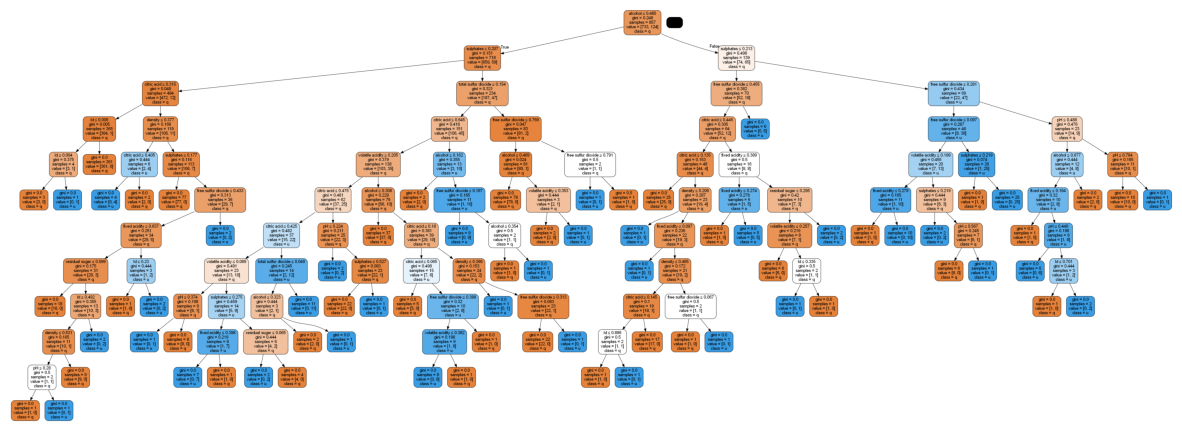

In [35]:
plt.subplots(figsize = (15,15))
plt.axis('off')
plt.imshow(mpimg.imread('DT_classifier.png'))

In [36]:
X = df.drop(columns = ['quality','quality_binary']).values
y = df.quality.values.reshape(-1,1)
X_scaler = MinMaxScaler().fit(X)
X_new = X_scaler.transform(X)
y_scaler = MinMaxScaler().fit(y)
y_new = y_scaler.transform(y)

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X_new,y_new,train_size= 0.75, random_state= 101)

In [38]:
#Train the Decision tree regressor using the scaled data set
model2 = tree.DecisionTreeRegressor()
model2.fit(X_train,y_train)

DecisionTreeRegressor()

In [39]:
y_pred = model2.predict(X_test)

In [40]:
from sklearn.metrics import r2_score, mean_absolute_error,mean_squared_error,mean_absolute_percentage_error
print(r2_score(y_test, y_pred))
print(mean_absolute_error(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))

-0.0824322076193642
0.09930069930069939
0.02545454545454547


In [41]:
dot_data2 = tree.export_graphviz(model2, 
                     feature_names=feature_set,
                     out_file = 'regression_tree.dot',
                     class_names='quality',  
                     filled=True, rounded=True,  
                     special_characters=True) 
graphviz.Source(dot_data)
(graph2,) = pydot.graph_from_dot_file('regression_tree.dot')
graph2.write_png('DT_regressor.png')

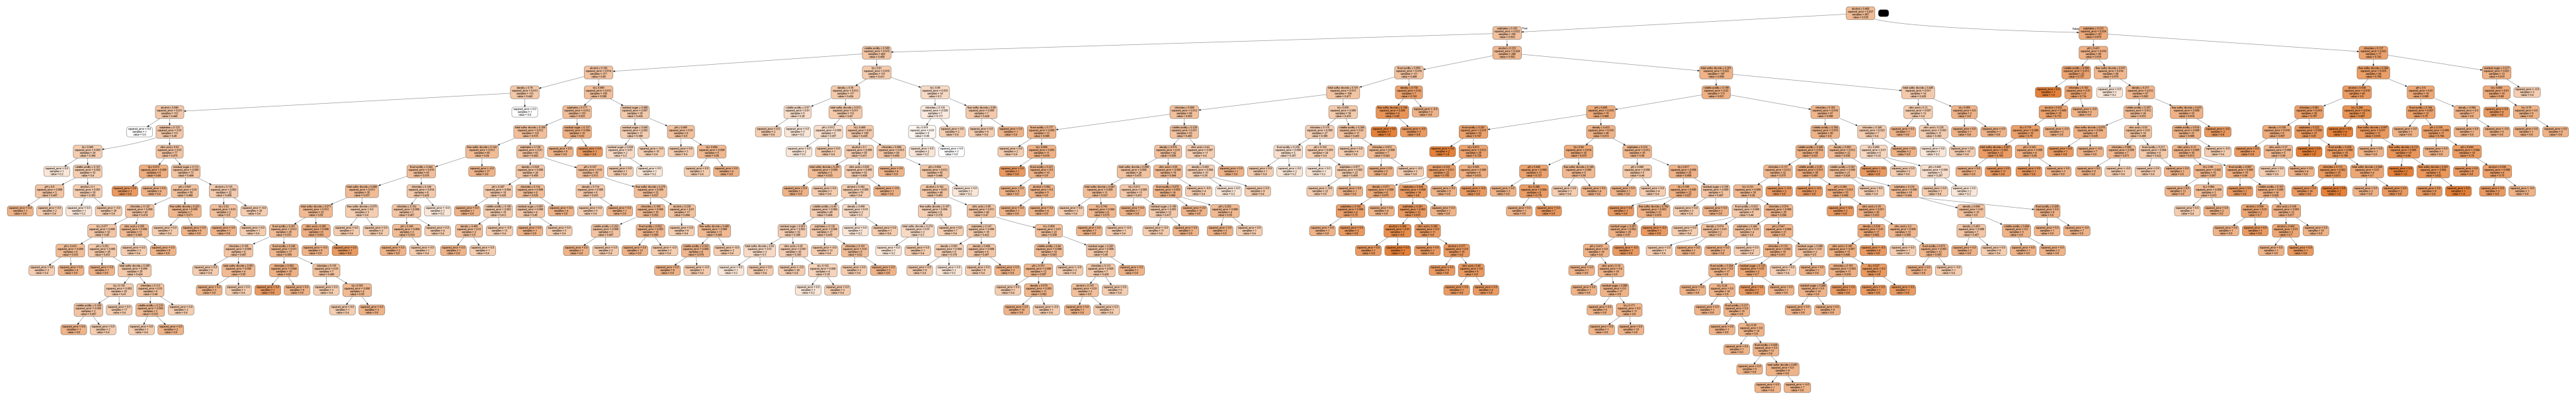

In [42]:
#Display the Decision tree regressor which estimates the quality of wine
plt.subplots(figsize = (50,15))
plt.axis('off')
plt.imshow(mpimg.imread('DT_regressor.png'))